In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime 
import re, os
from pathlib import Path 
import glob
import wordcloud
from wordcloud import WordCloud 
from wordcloud import STOPWORDS

In [22]:
data_path = Path.cwd() / "data"

In [23]:
data_path.as_posix()

'/Users/emilyzou/stat303/proj/data'

In [24]:
files = os.path.join ("/Users/emilyzou/stat303/proj/data", "nuallcomments*.csv") 
files = glob.glob (files)
merged = pd.concat (map(pd.read_csv, files), ignore_index=True) 
merged

,Unnamed: 0,author,body,created_utc,id,permalink,subreddit,created,d_
0,0,worldsawayfromhere,Around February the housing portal will open a...,2018-12-31 05:23:29,ecxd4sx,/r/Northwestern/comments/ab37bs/ed_helpquestio...,Northwestern,1.546252e+09,"{'author': 'worldsawayfromhere', 'body': ""Arou..."
1,1,xoxohearttt,Can anyone explain the process of ranking/choo...,2018-12-31 05:03:50,ecxbtzz,/r/Northwestern/comments/ab37bs/ed_helpquestio...,Northwestern,1.546251e+09,"{'author': 'xoxohearttt', 'body': 'Can anyone ..."
2,2,DerpityHerpington,Someone wanna read my Common App essay?,2018-12-31 04:43:21,ecxag6v,/r/Northwestern/comments/aangio/nu_supplement_...,Northwestern,1.546249e+09,"{'author': 'DerpityHerpington', 'body': 'Someo..."
3,3,vlew4,"If you want me to still read your essay, beca...",2018-12-31 04:31:48,ecx9o6a,/r/Northwestern/comments/aangio/nu_supplement_...,Northwestern,1.546249e+09,"{'author': 'vlew4', 'body': ' If you want me t..."
4,4,therealM1G,There is like a 2.5 step ledge behind the new ...,2018-12-31 01:29:21,ecwwupx,/r/Northwestern/comments/aacipw/skateboards_bi...,Northwestern,1.546238e+09,"{'author': 'therealM1G', 'body': ""There is lik..."
...,...,...,...,...,...,...,...,...,...
22586,4987,Hyunion,damn willie is packing heat,2022-07-09 22:43:16,ifj1cwt,/r/Northwestern/comments/vv5n5p/is_willie_the_...,Northwestern,1.657425e+09,"{'author': 'Hyunion', 'body': 'damn willie is ..."
22587,4988,theergscaresme,oh no\n\n\n\n\n\n\nwhat RH were you living in👀,2022-07-09 22:27:12,ifiza43,/r/Northwestern/comments/vv5n5p/is_willie_the_...,Northwestern,1.657424e+09,"{'author': 'theergscaresme', 'body': 'oh no\n\..."
22588,4989,LPlusL,not super big like the rest of the Big 10 scho...,2022-07-09 20:59:05,ifinrnb,/r/Northwestern/comments/vv50r7/how_much_of_th...,Northwestern,1.657418e+09,"{'author': 'LPlusL', 'body': ""not super big li..."
22589,4990,pummer,Happened just as I describe to more than 1 hou...,2022-07-09 20:41:16,ifile9h,/r/Northwestern/comments/vukfxk/junior_year_ho...,Northwestern,1.657417e+09,"{'author': 'pummer', 'body': 'Happened just as..."


In [25]:
merged = merged.drop(columns = ['id', 'permalink', 'subreddit', 'created', 'd_'])

In [26]:
merged

,Unnamed: 0,author,body,created_utc
0,0,worldsawayfromhere,Around February the housing portal will open a...,2018-12-31 05:23:29
1,1,xoxohearttt,Can anyone explain the process of ranking/choo...,2018-12-31 05:03:50
2,2,DerpityHerpington,Someone wanna read my Common App essay?,2018-12-31 04:43:21
3,3,vlew4,"If you want me to still read your essay, beca...",2018-12-31 04:31:48
4,4,therealM1G,There is like a 2.5 step ledge behind the new ...,2018-12-31 01:29:21
...,...,...,...,...
22586,4987,Hyunion,damn willie is packing heat,2022-07-09 22:43:16
22587,4988,theergscaresme,oh no\n\n\n\n\n\n\nwhat RH were you living in👀,2022-07-09 22:27:12
22588,4989,LPlusL,not super big like the rest of the Big 10 scho...,2022-07-09 20:59:05
22589,4990,pummer,Happened just as I describe to more than 1 hou...,2022-07-09 20:41:16


In [27]:
season = (merged[merged['body'].str.contains("Spring|spring|Summer|summer|Autumn|autumn|Fall|fall|Winter|winter")])
season = season.drop (columns = ['Unnamed: 0'])

In [28]:
season ["Season Mention"] = season ['body'].apply (lambda x: 'Spring' if 'Spring' in x else ("Spring" if 'spring' in x else 
                                                            ("Summer" if "Summer" in x else ("Summer" if 'summer' in x else 
                                                            ("Fall" if "Fall" in x else ('Fall' if 'fall' in x else ('Fall' if 'Autumn' in x else ('Fall' if 'autumn' in x else 
                                                            ("Winter" if "Winter" in x else ('Winter' if 'winter' in x else (x)))))))))))  
season

,author,body,created_utc,Season Mention
35,TurnDownForPage394,"FWIW, I know people who were randomly matched ...",2018-12-30 06:58:14,Fall
73,tifflesz,"Yep, really easy with lots of opportunities. I...",2018-12-29 11:04:48,Spring
92,hamletandskull,Skateboarding should be fine because the sidew...,2018-12-28 23:29:23,Fall
97,contrarianism,I used to ride my bike all year winter include...,2018-12-28 20:06:09,Winter
98,aspoonj,"I skate everywhere every day, easy shit, only ...",2018-12-28 20:00:43,Fall
...,...,...,...,...
22527,voncoluted,Hi. NU student on MLOA here. I’ve been on MLOA...,2022-07-11 22:57:39,Summer
22528,lunaiota,Hi. NU student on MLOA here. I’ve been on MLOA...,2022-07-11 22:55:51,Summer
22535,chiefyuls,I recommend taking college as an opportunity t...,2022-07-11 19:49:31,Fall
22540,TheOfficialHedgehog,"I second everything said here, but I would not...",2022-07-11 15:42:51,Winter


In [29]:
season ['Season Mention'].value_counts()

Fall      315
Winter    276
Summer    205
Spring    197
Name: Season Mention, dtype: int64

In [30]:
Fall = (season[season['Season Mention'].str.contains("Fall")])
Winter = (season[season['Season Mention'].str.contains("Winter")])
Summer = (season[season['Season Mention'].str.contains("Summer")])
Spring = (season[season['Season Mention'].str.contains("Spring")])


In [31]:
stopwords = set (STOPWORDS)
stopwords.update (['will', 'really', 'though', 'thing', 'one', 'fall', 'winter', 'spring', 'summer', 's'])

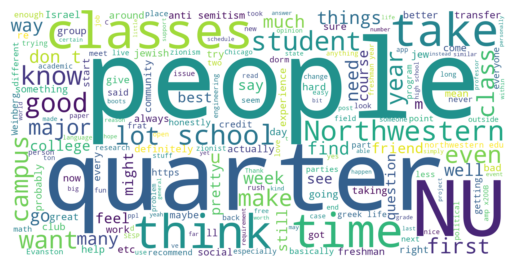

<Figure size 2000x1000 with 0 Axes>

In [32]:
text = " ".join (x for x in Fall ['body']) 
wordcloud = WordCloud(width = 1600, height = 800, background_color = "white", stopwords = stopwords).generate(text)
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.figure (figsize = (20,10))
plt.show()

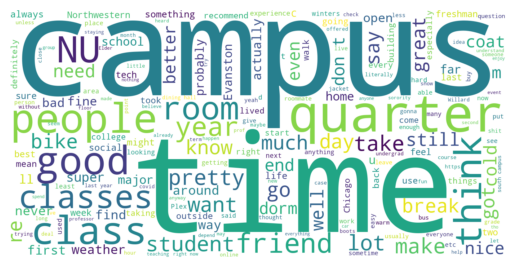

<Figure size 2000x1000 with 0 Axes>

In [33]:
text = " ".join (x for x in Winter ['body']) 
wordcloud = WordCloud(width = 1600, height = 800, background_color = "white", stopwords = stopwords).generate(text)
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.figure (figsize = (20,10))
plt.show()

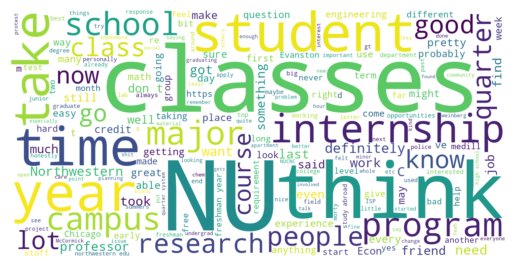

<Figure size 2000x1000 with 0 Axes>

In [34]:
text = " ".join (x for x in Summer ['body']) 
wordcloud = WordCloud(width = 1600, height = 800, background_color = "white", stopwords = stopwords).generate(text)
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.figure (figsize = (20,10))
plt.show()

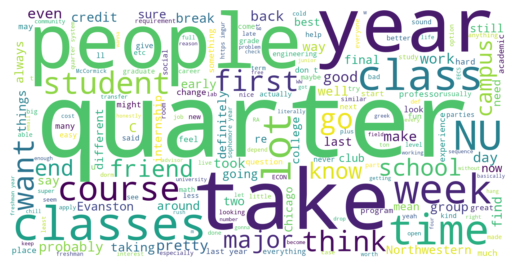

<Figure size 2000x1000 with 0 Axes>

In [35]:
text = " ".join (x for x in Spring ['body']) 
wordcloud = WordCloud(width = 1600, height = 800, background_color = "white", stopwords = stopwords).generate(text)
plt.imshow (wordcloud, interpolation = "bilinear")
plt.axis ("off")
plt.figure (figsize = (20,10))
plt.show()